In [1]:
import numpy as np
import pylab
import copy
from qiskit import BasicAer
from qiskit.opflow import I, X, Y, Z
import scipy as sp
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute


In [2]:

# Construct the Hamiltonian (1 qubit)




while True:
    coefficients = np.random.rand(4)
    hamiltonian = coefficients[0] * I + coefficients[1] * X + coefficients[2] * Y + coefficients[3] * Z
    eigensolver = np.linalg.eig(hamiltonian.to_matrix())
    if np.all(eigensolver[0].imag == 0):
        break



num_qubits = hamiltonian.num_qubits

print(hamiltonian.to_matrix())










[[1.58825388+0.j         0.80224898-0.88243121j]
 [0.80224898+0.88243121j 0.17743891+0.j        ]]


In [3]:
#classical eigensolve for target energy
eigensolver = np.linalg.eig(hamiltonian.to_matrix())
target_energy = min(eigensolver[0])
print(eigensolver[0])


[ 2.26844662+0.j -0.50275383+0.j]


/Users/jonahsachs/opt/miniconda3/envs/cse468/lib/python3.7/site-packages/qiskit/circuit/tools/pi_check.py:55: SymPyDeprecationWarning: 

The expr_free_symbols property is deprecated. Use free_symbols to get
the free symbols of an expression.

See https://docs.sympy.org/latest/explanation/active-deprecations.html#deprecated-expr-free-symbols
for details.

This has been deprecated since SymPy version 1.9. It
will be removed in a future version of SymPy.

  syms = expr.expr_free_symbols


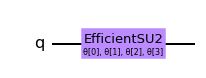

In [4]:
from qiskit.circuit.library import EfficientSU2

ansatz = QuantumCircuit(1)
ansatz = EfficientSU2(num_qubits, reps=1, entanglement='linear', insert_barriers=True)
ansatz.draw('mpl')

In [5]:
from qiskit.algorithms.optimizers import SPSA

from qiskit.algorithms.optimizers import COBYLA

from qiskit.algorithms.optimizers import SLSQP

from qiskit.algorithms.optimizers import ADAM

iterations = 100

#optimzer declaration
# optimizer = COBYLA(maxiter=iterations)
optimizer = SPSA(maxiter=iterations)
# optimizer = SLSQP(maxiter=iterations)
# optimizer = ADAM(maxiter=iterations)



#intial guess for eigenvalue (randomly generated)
initial_point = np.random.rand(ansatz.num_parameters)



In [6]:
#intermediate info for convience later

intermediate_info = {'nfev': [], 'parameters': [], 'energy': [], 'std': []}

def callback(nfev,parameters,energy,std):
    intermediate_info['nfev'].append(nfev)
    intermediate_info['parameters'].append(parameters)
    intermediate_info['energy'].append(energy)
    intermediate_info['std'].append(std)


In [7]:
#local simulation

from qiskit.providers.basicaer import QasmSimulatorPy
from qiskit.algorithms import VQE
import matplotlib.pyplot as plt

intermediate_info = {'nfev': [], 'parameters': [], 'energy': [], 'std': []} #clear intermediate info

local_vqe = VQE(ansatz=ansatz,
                optimizer=optimizer,
                initial_point=initial_point,
                quantum_instance=QasmSimulatorPy(),
                callback=callback)



/Users/jonahsachs/opt/miniconda3/envs/cse468/lib/python3.7/site-packages/qiskit/circuit/tools/pi_check.py:55: SymPyDeprecationWarning: 

The expr_free_symbols property is deprecated. Use free_symbols to get
the free symbols of an expression.

See https://docs.sympy.org/latest/explanation/active-deprecations.html#deprecated-expr-free-symbols
for details.

This has been deprecated since SymPy version 1.9. It
will be removed in a future version of SymPy.

  syms = expr.expr_free_symbols


In [8]:
local_result = local_vqe.compute_minimum_eigenvalue(hamiltonian)


/Users/jonahsachs/opt/miniconda3/envs/cse468/lib/python3.7/site-packages/qiskit/utils/run_circuits.py:695: UserWarning: Option max_credits is not used by this backend
  return backend.run(circuits, **run_kwargs)


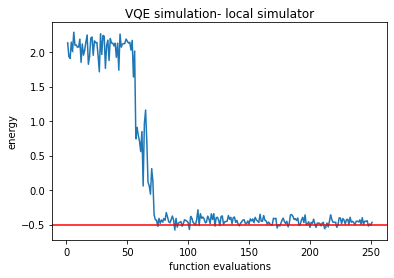

In [10]:
energy = intermediate_info['energy']
timestamps = intermediate_info['nfev']

#convert timestamps to minutes

plt.rcParams['lines.markersize'] = .1
plt.plot(timestamps, energy, 'o-')
plt.xlabel('function evaluations')
plt.ylabel('energy')


#plot target energy
plt.axhline(y=target_energy, color='r', linestyle='-')
plt.title('VQE simulation- local simulator')

# plt.savefig('Optimizers/SPSA2.png',facecolor='w', edgecolor='w', orientation='portrait', papertype=None, format=None,dpi = 250)
plt.show()

In [ ]:
#zoom in on the target energy, why is it below? 

/Users/jonahsachs/opt/miniconda3/envs/cse468/lib/python3.7/site-packages/matplotlib/transforms.py:2877: ComplexWarning: Casting complex values to real discards the imaginary part
  vmin, vmax = map(float, [vmin, vmax])


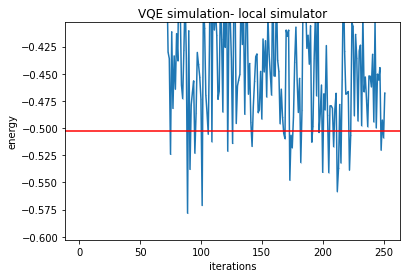

In [11]:
plt.plot(timestamps, energy, 'o-')
plt.xlabel('iterations')
plt.ylabel('energy')
plt.axhline(y=target_energy, color='r', linestyle='-')
plt.title('VQE simulation- local simulator')
plt.ylim(target_energy-.1, target_energy+.1)


plt.show()

In [ ]:
#error in variational principle is due to SPSA optimizer, not quantum properties
